## Exercice : 

### Origine sociale (CSP parents) vs. Choix d’études à l’Université

Quelques questions simples pour caractériser la relation :
1. Structure des filières choisies selon la CSP (profils lignes)
2. Différences/ressemblances des structures de choix selon les CSP (distance)
3. Idem – Structure des CSP des parents selon les filières (profils colonnes)
4. Associations entre CSP et FILIERES : Qui choisit quoi ? Quoi est choisi par qui ?

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Installation du package fanalysis
!pip install fanalysis==0.0.1

In [ ]:
import pandas as pd
from fanalysis.ca import CA
import numpy as np

In [ ]:
df = pd.read_excel("/content/drive/MyDrive/MT15/TP3_AFC/data/afc_ex.xlsx", index_col=0)

In [ ]:
print(df)

           Droit  Science  Medecine  IUT
CSP/Fil.                                
Exp.agri      80       99        65   58
Patron       168      137       208   63
Cadre.sup    470      400       876   79
Emp.         145      133       135   54
Ouvrier      166      193       127  129


In [ ]:
#Calculer et change type
X=df.values.astype(float)#change type
n=np.sum(X)#quantite
print(X)
print(n)

[[ 80.  99.  65.  58.]
 [168. 137. 208.  63.]
 [470. 400. 876.  79.]
 [145. 133. 135.  54.]
 [166. 193. 127. 129.]]
3785.0


In [ ]:
#Calcul des profils lignes
Profils_lignes=X.copy()
somme_ligne=np.sum(X,axis=1)
for i in range(X.shape[0]):
  for j in range(X.shape[1]):
    Profils_lignes[i,j]=round(Profils_lignes[i,j]/somme_ligne[i],3)
df_profils_ligne=pd.DataFrame(Profils_lignes,columns=df.columns,index=df.index)
df_profils_ligne

,Droit,Science,Medecine,IUT
CSP/Fil.,,,,
Exp.agri,0.265,0.328,0.215,0.192
Patron,0.292,0.238,0.361,0.109
Cadre.sup,0.258,0.219,0.480,0.043
Emp.,0.310,0.285,0.289,0.116
Ouvrier,0.270,0.314,0.207,0.210


In [ ]:
#check
print(np.sum(df_profils_ligne,axis=1))

CSP/Fil.
Exp.agri     1.000
Patron       1.000
Cadre.sup    1.000
Emp.         1.000
Ouvrier      1.001
dtype: float64


In [ ]:
#Calcul des profils lignes
Profils_colonne=X.copy()
somme_colonne=np.sum(X,axis=0)
for i in range(X.shape[0]):
  for j in range(X.shape[1]):
    Profils_colonne[i,j]=round(Profils_colonne[i,j]/somme_colonne[j],3)
df_profils_colonne=pd.DataFrame(Profils_colonne,columns=df.columns,index=df.index)
df_profils_colonne

,Droit,Science,Medecine,IUT
CSP/Fil.,,,,
Exp.agri,0.078,0.103,0.046,0.151
Patron,0.163,0.142,0.147,0.164
Cadre.sup,0.457,0.416,0.621,0.206
Emp.,0.141,0.138,0.096,0.141
Ouvrier,0.161,0.201,0.090,0.337


In [ ]:
#check
print(np.sum(df_profils_colonne,axis=0))

Droit       1.000
Science     1.000
Medecine    1.000
IUT         0.999
dtype: float64


In [ ]:
#Calcul du profil moyen ligne
Profil_moyen_ligne =np.round(somme_colonne/n,3)
df_profil_moyen_ligne=pd.DataFrame(Profil_moyen_ligne.reshape(1,np.shape(X)[1]),columns=df.columns,index=['Profil_ligne_moyen'])
df_profils_ligne = pd.concat([df_Profils_ligne,df_profil_moyen_ligne])
df_profils_ligne

,Droit,Science,Medecine,IUT
Exp.agri,0.265,0.328,0.215,0.192
Patron,0.292,0.238,0.361,0.109
Cadre.sup,0.258,0.219,0.480,0.043
Emp.,0.310,0.285,0.289,0.116
Ouvrier,0.270,0.314,0.207,0.210
Profil_ligne_moyen,0.272,0.254,0.373,0.101


In [ ]:
#Calcul du profil moyen ligne
Profil_moyen_colonne = np.around(somme_ligne/n,3)
df_profils_colonne["profil_moyen_ligne"]=Profil_moyen_colonne
df_profils_colonne

,Droit,Science,Medecine,IUT,profil_moyen_ligne
CSP/Fil.,,,,,
Exp.agri,0.078,0.103,0.046,0.151,0.080
Patron,0.163,0.142,0.147,0.164,0.152
Cadre.sup,0.457,0.416,0.621,0.206,0.482
Emp.,0.141,0.138,0.096,0.141,0.123
Ouvrier,0.161,0.201,0.090,0.337,0.162


In [ ]:
#application AFC
afc = CA(row_labels=df.index.values,col_labels=df.columns.values)
afc.fit(X)

CA(col_labels=array(['Droit', 'Science', 'Medecine', 'IUT'], dtype=object),
   row_labels=array(['Exp.agri', 'Patron', 'Cadre.sup', 'Emp.', 'Ouvrier'], dtype=object))

In [ ]:
# Affichage des valeurs propres
print("Valeur propres\n",afc.eig_[0])
# Pourcentage de l'inertie exprimée par chaque axe
print("Poutcentage\n",afc.eig_[1])
print(np.sum(afc.eig_[1]))
# Pourcentage cumulé de l'inertie totale
print("Pourcentage cumule\n",afc.eig_[2])

Valeur propres
 [0.08231106 0.00168257 0.00057241]
Poutcentage
 [97.3334662  1.9896516  0.6768822]
100.0
Pourcentage cumule
 [ 97.3334662  99.3231178 100.       ]


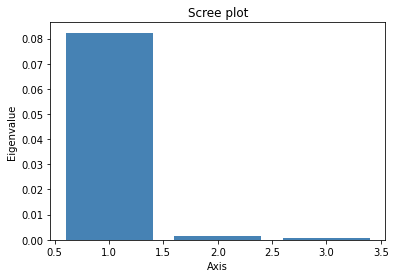

In [ ]:
afc.plot_eigenvalues()

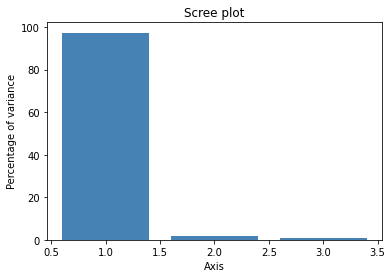

In [ ]:
afc.plot_eigenvalues(type="percentage")

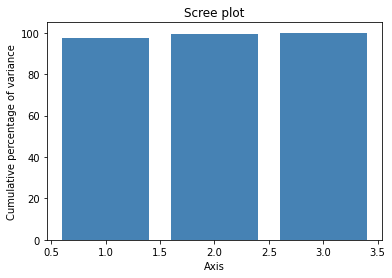

In [ ]:
afc.plot_eigenvalues(type="cumulative")

In [ ]:
#Extraction des statistiques sur les points lignes
df_rows = afc.row_topandas()
df_rows

,row_coord_dim1,row_coord_dim2,row_coord_dim3,row_contrib_dim1,row_contrib_dim2,row_contrib_dim3,row_cos2_dim1,row_cos2_dim2,row_cos2_dim3
Exp.agri,0.409300,-0.025581,0.039031,16.239297,3.103142,21.234907,0.987167,0.003856,0.008977
Patron,0.023393,0.023966,-0.048951,0.101170,5.194893,63.703800,0.155557,0.163278,0.681165
Cadre.sup,-0.263181,-0.015126,0.006568,40.573908,6.556144,3.634225,0.996089,0.003290,0.000620
Emp.,0.141529,0.097860,0.020799,3.002494,70.223833,9.324904,0.666802,0.318797,0.014402
Ouvrier,0.450615,-0.039309,-0.008606,40.083131,14.921988,2.102164,0.992088,0.007550,0.000362


In [ ]:
# Coordonnées des points lignes
print(np.around(afc.row_coord_,3))

[[ 0.409 -0.026  0.039]
 [ 0.023  0.024 -0.049]
 [-0.263 -0.015  0.007]
 [ 0.142  0.098  0.021]
 [ 0.451 -0.039 -0.009]]


In [ ]:
# Contributions des points lignes
np.set_printoptions(suppress=True)
print(np.round(afc.row_contrib_,3))

[[16.239  3.103 21.235]
 [ 0.101  5.195 63.704]
 [40.574  6.556  3.634]
 [ 3.002 70.224  9.325]
 [40.083 14.922  2.102]]


In [ ]:
# Qualité de représentation COS2 des points lignes
print(np.round(afc.row_cos2_,3))

[[0.987 0.004 0.009]
 [0.156 0.163 0.681]
 [0.996 0.003 0.001]
 [0.667 0.319 0.014]
 [0.992 0.008 0.   ]]


In [ ]:
#Extraction des statistiques sur les points colonnes
df_cols = afc.col_topandas()
df_cols

,col_coord_dim1,col_coord_dim2,col_coord_dim3,col_contrib_dim1,col_contrib_dim2,col_contrib_dim3,col_cos2_dim1,col_cos2_dim2,col_cos2_dim3
Droit,0.028124,0.060061,-0.017332,0.261244,58.285261,14.267233,0.168338,0.767729,0.063933
Science,0.160310,0.003275,0.038696,7.935510,0.162003,66.486371,0.944570,0.000394,0.055036
Medecine,-0.303205,-0.029529,-0.005207,41.636552,19.318997,1.765720,0.990315,0.009393,0.000292
IUT,0.638808,-0.060803,-0.031446,50.166694,22.233739,17.480676,0.988647,0.008957,0.002396


In [ ]:
# Coordonnées des points colonnes
print(np.round(afc.col_coord_,3))

[[ 0.028  0.06  -0.017]
 [ 0.16   0.003  0.039]
 [-0.303 -0.03  -0.005]
 [ 0.639 -0.061 -0.031]]


In [ ]:
# Contributions des points colonnes
print(np.round(afc.col_contrib_,3))

[[ 0.261 58.285 14.267]
 [ 7.936  0.162 66.486]
 [41.637 19.319  1.766]
 [50.167 22.234 17.481]]


In [ ]:
# Qualité de représentation COS2 des points colonnes
print(np.round(afc.col_cos2_,3))

[[0.168 0.768 0.064]
 [0.945 0.    0.055]
 [0.99  0.009 0.   ]
 [0.989 0.009 0.002]]


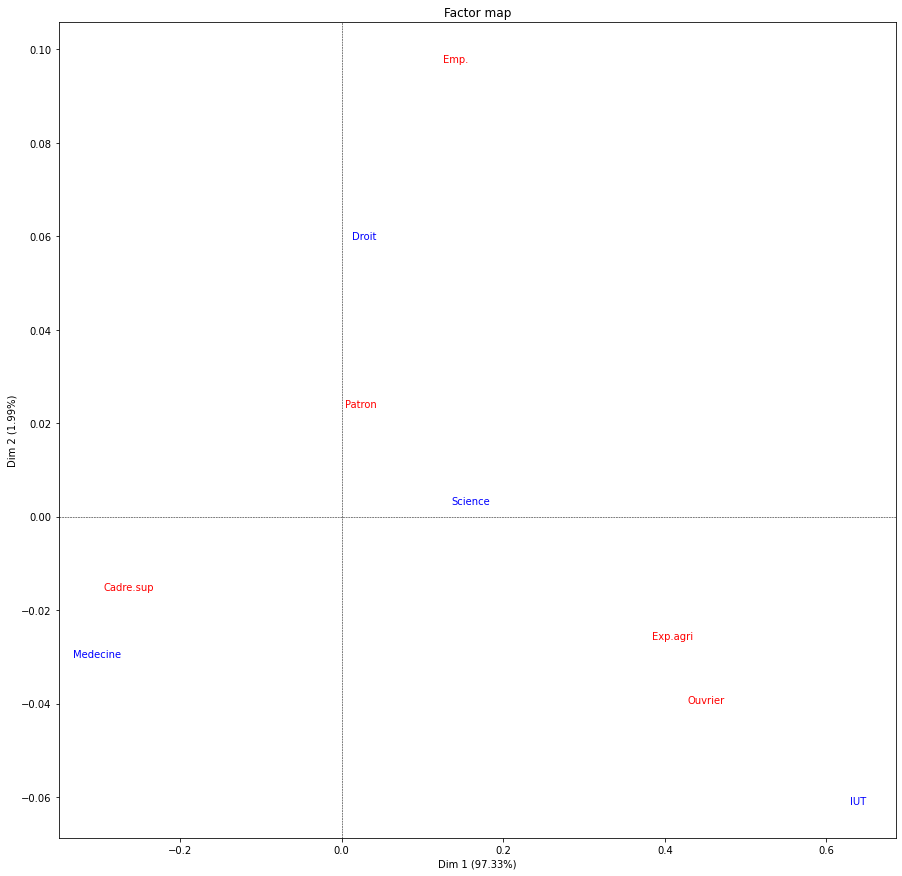

In [ ]:
# Représentation graphique simultanée des points lignes et colonnes
# Les paramètres de la méthode mapping indiquent que ce sont les axes 1 et 2 qui sont ici représentés
afc.mapping(num_x_axis=1, num_y_axis=2,figsize=(15,15))

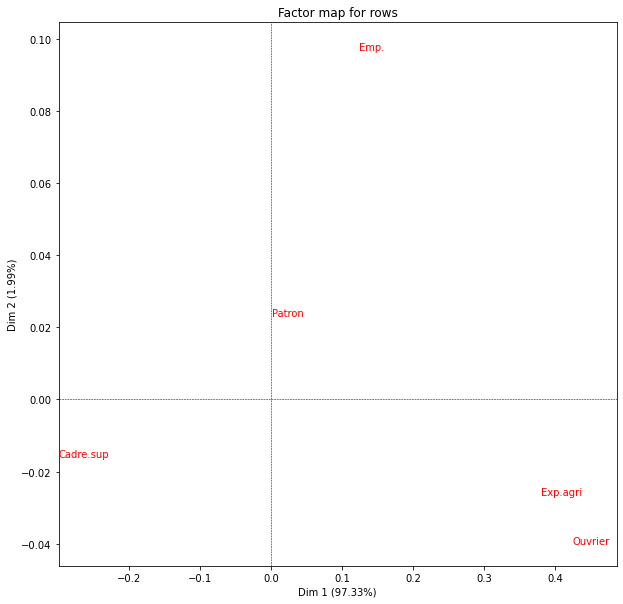

In [ ]:
# Représentation graphique des points lignes
afc.mapping_row(num_x_axis=1, num_y_axis=2,figsize=(10,10))

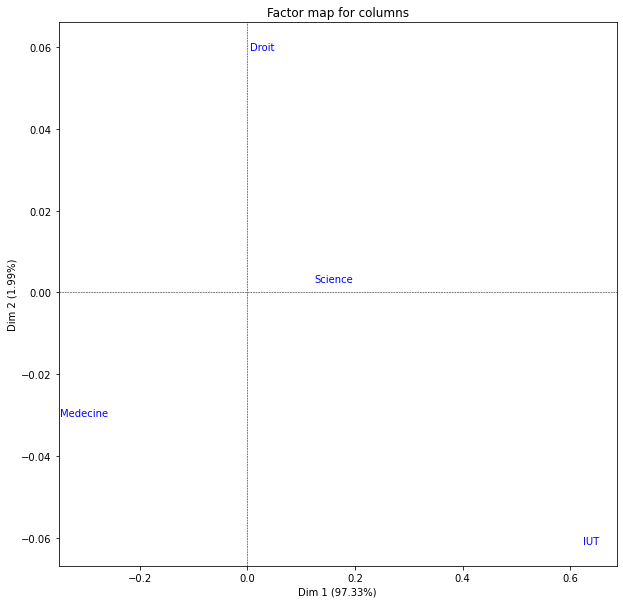

In [ ]:
# Représentation graphique des points colonnes
afc.mapping_col(num_x_axis=1, num_y_axis=2,figsize=(10,10))

Analyse du 1er axe - Points lignes

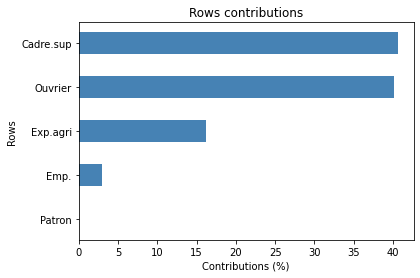

In [ ]:
# Classement des points lignes en fonction de leur contribution au 1er axe
# Le paramètre de la méthode plot_row_contrib indique que c'est pour l'axe numéro 1 que les contributions sont ici représentées
afc.plot_row_contrib(num_axis=1)

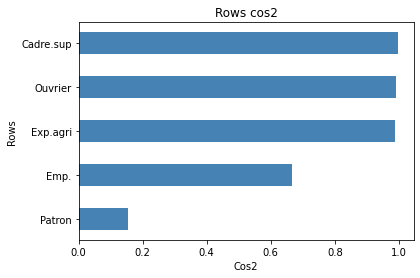

In [ ]:
# Classement des points lignes en fonction de leur cos2 sur le 1er axe
afc.plot_row_cos2(num_axis=1)

Analyse du 1er axe - Points colonnes

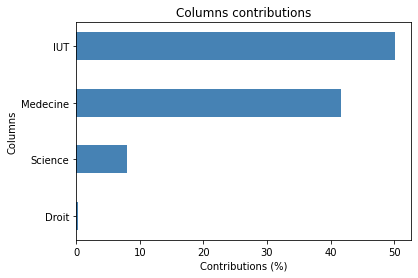

In [ ]:
# Classement des points colonnes en fonction de leur contribution au 1er axe
afc.plot_col_contrib(num_axis=1)

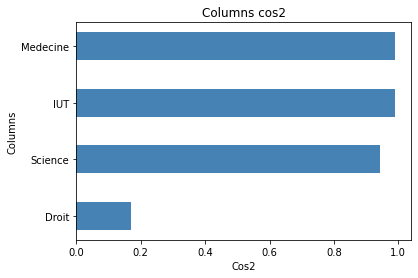

In [ ]:
# Classement des points colonnes en fonction de leur cos2 sur le 1er axe
afc.plot_col_cos2(num_axis=1)

Exp.agri choisit Science

Patron choisit Medecine

Cadre.sup choisit Medecine

Emp. choisit Droit

Ouvrier choisit Science

Droit choisit Cadre.sup

Science choisit Cadre.sup

Medecine choisit Cadre.sup

IUT choisit Ouvrier